# Lead Scoring Case Study

### Importing and Merging Data

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from matplotlib.pyplot import xticks
%matplotlib inline

In [4]:
# Importing dataset
leads_data = pd.read_csv("Leads.csv")

In [5]:
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
leads_data.shape

(9240, 37)

In [8]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

#### Data Cleaning

In [9]:
leads_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
# Converting 'Select' values to NaN.
leads_data = leads_data.replace('Select', np.nan)

In [11]:
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [12]:
# we will drop the columns having more than 60% NA values.
leads_data = leads_data.drop(leads_data.loc[:,list(round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)>60)].columns, 1)

In [13]:
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [14]:
# There is a variation of 45% null values means we need to drop these columns.
leads_data = leads_data.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],1)



Replace all null values with probable values

In [15]:
#Let us take 'Lead Quality' and check.
leads_data['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

In [16]:
#Replace all null values with 'Might be' as it is the highest
leads_data['Lead Quality'] = leads_data['Lead Quality'].replace(np.nan, 'Might be')

In [17]:
#Let us check for the column 'City'
leads_data.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

In [18]:
#Replace all null values with 'Mumbai' as it is the highest
leads_data['City'] = leads_data['City'].replace(np.nan, 'Mumbai')

In [19]:
#Let us check for the column 'Specialization'
leads_data.Specialization.describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

In [20]:
#As we are not sure of the specialization, we can replace it with 'Others'
leads_data['Specialization'] = leads_data['Specialization'].replace(np.nan, 'Others')

In [21]:
#Let us check for the column 'Tags'
leads_data.Tags.describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

In [22]:
leads_data['Tags'] = leads_data['Tags'].replace(np.nan, 'Will revert after reading the email')

In [23]:
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [24]:
#Let us check for the column 'What matters most to you in choosing a course'
leads_data['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [25]:
leads_data['What matters most to you in choosing a course'] = leads_data['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [26]:
#Let us check for the column 'What is your current occupation'
leads_data['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [27]:
leads_data['What is your current occupation'] = leads_data['What is your current occupation'].replace(np.nan, 'Unemployed')

In [28]:
#Let us check for the column 'Country'
leads_data['Country'].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [29]:
leads_data['Country'] = leads_data['Country'].replace(np.nan, 'India')

In [30]:
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [31]:
leads_data.dropna(inplace = True)

### Univariate Analysis

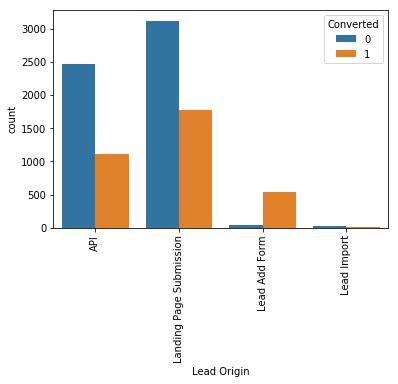

In [32]:
#Lead Origin
sns.countplot(x = "Lead Origin", hue = "Converted", data = leads_data)
xticks(rotation = 90)
plt.show()

In [33]:
#Lead Source
leads_data['Lead Source'] = leads_data['Lead Source'].replace(['google'], 'Google')
leads_data['Lead Source'] = leads_data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

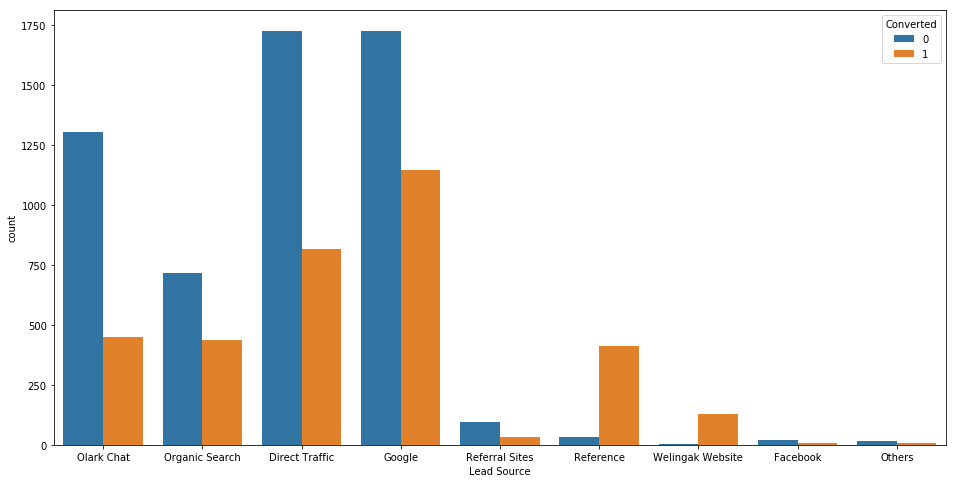

In [34]:
plt.subplots(figsize = (16,8))
sns.countplot(x = "Lead Source", hue = "Converted", data = leads_data)
plt.show()

# Google and Direct Traffic have higher number of leads.

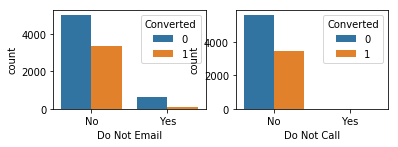

In [35]:
#Do Not Email and Do not Call
plt.subplot(2, 2, 1)
sns.countplot(x = "Do Not Email", hue = "Converted", data = leads_data)

plt.subplot(2, 2, 2)
sns.countplot(x = "Do Not Call", hue = "Converted", data = leads_data)

plt.show()

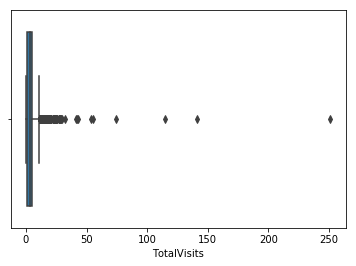

In [36]:
#Total Visits
sns.boxplot(leads_data['TotalVisits'])
plt.show()

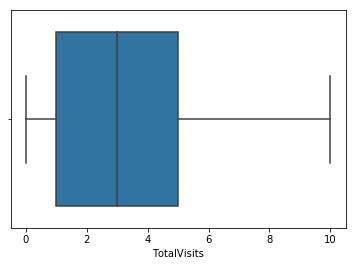

In [37]:
#As there are many number of outliers in Total Visits, we shall try and remove them
percentiles = leads_data['TotalVisits'].quantile([0.05,0.95]).values
leads_data['TotalVisits'][leads_data['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads_data['TotalVisits'][leads_data['TotalVisits'] >= percentiles[1]] = percentiles[1]

sns.boxplot(leads_data['TotalVisits'])
plt.show()

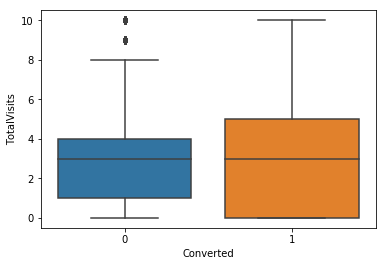

In [38]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads_data)
plt.show()

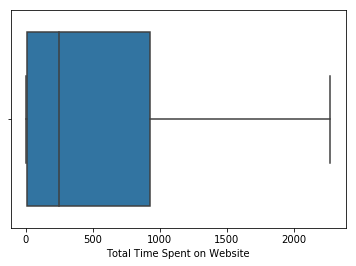

In [39]:
#Total time spent on website
sns.boxplot(leads_data['Total Time Spent on Website'])
plt.show()

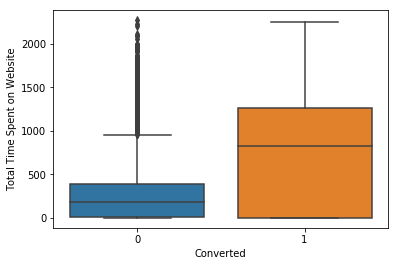

In [40]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads_data)
plt.show()

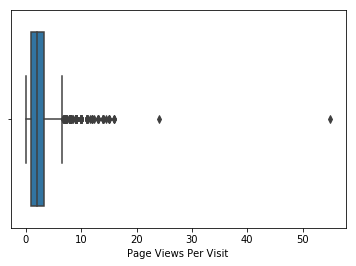

In [41]:
#Page Views per visit
sns.boxplot(leads_data['Page Views Per Visit'])
plt.show()

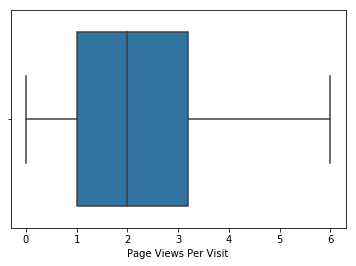

In [42]:
#Treating outliers
percentiles = leads_data['Page Views Per Visit'].quantile([0.05,0.95]).values
leads_data['Page Views Per Visit'][leads_data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads_data['Page Views Per Visit'][leads_data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

sns.boxplot(leads_data['Page Views Per Visit'])
plt.show()

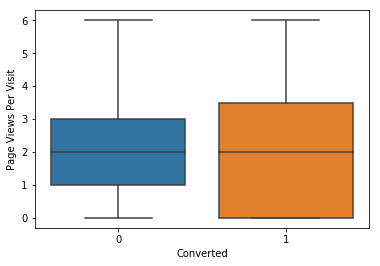

In [43]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads_data)
plt.show()

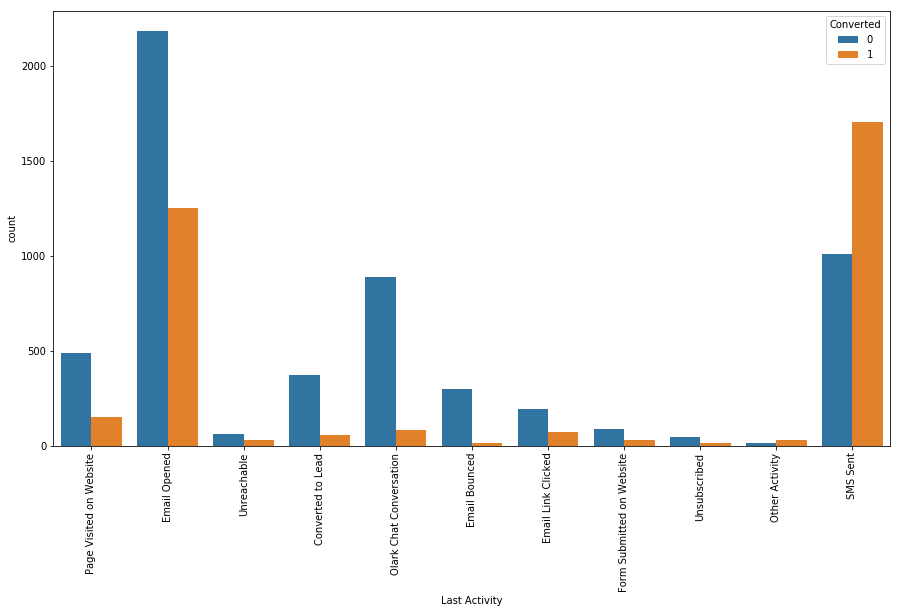

In [44]:
#Last Activity
leads_data['Last Activity'] = leads_data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other Activity')

plt.figure(figsize = (15,8)) 
sns.countplot(x = "Last Activity", hue = "Converted", data = leads_data)
xticks(rotation = 90)
plt.show()

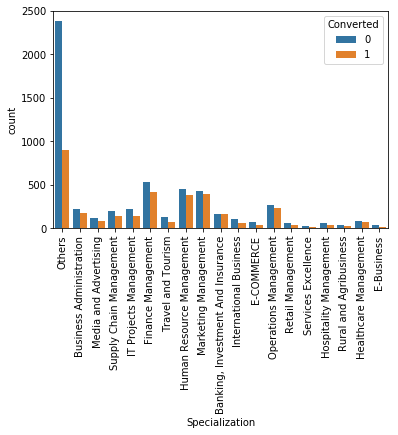

In [45]:
#Specialization
leads_data['Specialization'] = leads_data['Specialization'].replace(['Select'], 'Other')
sns.countplot(x = "Specialization", hue = "Converted", data = leads_data)
xticks(rotation = 90)
plt.show()

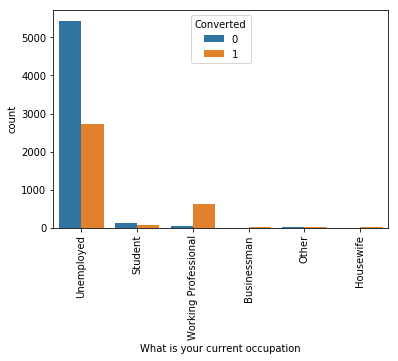

In [46]:
#Occupation
sns.countplot(x = "What is your current occupation", hue = "Converted", data = leads_data)
xticks(rotation = 90)
plt.show()

<function matplotlib.pyplot.show>

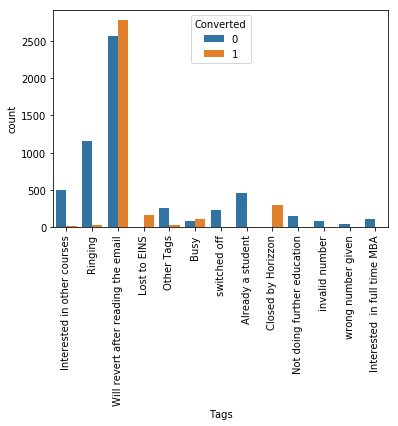

In [47]:
#Tags
leads_data['Tags'] = leads_data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other Tags')
sns.countplot(x = "Tags", hue = "Converted", data = leads_data)
xticks(rotation = 90)
plt.show

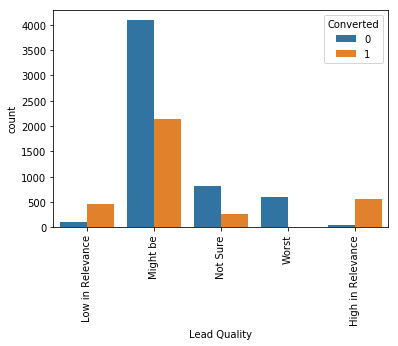

In [48]:
#Lead Quality
sns.countplot(x = "Lead Quality", hue = "Converted", data = leads_data)
xticks(rotation = 90)
plt.show()

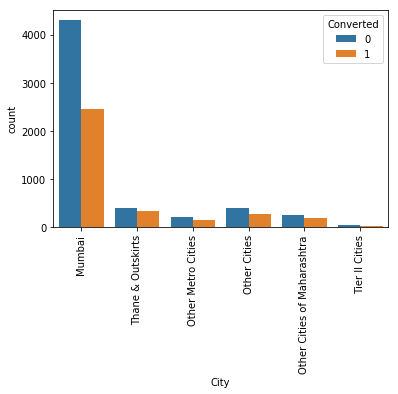

In [49]:
#City
sns.countplot(x = "City", hue = "Converted", data = leads_data)
xticks(rotation = 90)
plt.show()

In [50]:
#Drop insignificant columns
leads_data = leads_data.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'],1)

In [51]:
leads_data.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.191867,482.887481,2.265943
std,0.485053,2.780618,545.256560,1.790991
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
max,1.000000,10.000000,2272.000000,6.000000


In [52]:
leads_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Might be,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [53]:
leads_data.shape

(9074, 16)

### Data Preparation

In [54]:
# Converting Yes to 1 and No to 0
leads_data['Do Not Email'] = leads_data['Do Not Email'].map({'Yes': 1, 'No': 0})
leads_data['Do Not Call'] = leads_data['Do Not Call'].map({'Yes': 1, 'No': 0})

In [55]:
#Create dummy variables
dummy1 = pd.get_dummies(leads_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [56]:
leads_data = pd.concat([leads_data, dummy1], axis=1)
leads_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [57]:
leads_data = leads_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags','Lead Quality','City','Last Notable Activity'], axis = 1)

In [58]:
leads_data.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


### Model Building

In [59]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = leads_data.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [60]:
y = leads_data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [61]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [63]:
# Checking the Churn Rate
Converted = (sum(leads_data['Converted'])/len(leads_data['Converted'].index))*100
Converted

37.855411064580117

In [64]:
import statsmodels.api as sm

In [65]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6265
Model Family:                Binomial   Df Model:                           85
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -1382.7
Date:                Mon, 10 Jun 2019   Deviance:                       2765.3
Time:                        21:53:04   Pearson chi2:                 2.95e+04
No. Iterations:                    24                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   24.4091   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Do Not Email                                            -1.5246      0.299     -5.106      0.000      -2.110      -0.939
Do Not Call                                             21.9772   1.48e+05      0.000      1.000    -2.9e+05     2.9e+05
TotalVisits                                              0.1691      0.082      2.068      0.039       0.009       0.329
Total Time Spent on Website                              1.1374      0.060     18.959      0.000       1.020       1.255
Page Views Per Visit                                    -0.2473      0.092     -2.702      0.007      -0.427      -0.068
Lead Origin_Landing Page Submission                     -1.0504      0.207     -5.083      0.000      -1.455      -0.645
Lead Origin_Lead Add Form                               -0.0889      1.195     -0.074      0.941      -2.431       2.253
Lead Origin_Lead Import                                 27.2093   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Facebook                                   -25.8552   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Google                                       0.2226      0.143      1.562      0.118      -0.057       0.502
Lead Source_Olark Chat                                   0.8539      0.223      3.827      0.000       0.417       1.291
Lead Source_Organic Search                               0.1549      0.197      0.787      0.431      -0.231       0.541
Lead Source_Others                                       0.7124      0.765      0.931      0.352      -0.787       2.212
Lead Source_Reference                                    2.4190      1.250      1.935      0.053      -0.031       4.869
Lead Source_Referral Sites                               0.0666      0.443      0.150      0.880      -0.801       0.934
Lead Source_Welingak Website                             5.0879      1.407      3.616      0.000       2.330       7.846
Last Activity_Email Bounced                             -0.4253      0.823     -0.517      0.605      -2.038       1.188
Last Activity_Email Link Clicked                         0.5708      0.649      0.880      0.379      -0.701       1.842
Last Activity_Email Opened                               0.0114      0.367      0.031      0.975      -0.708       0.731
Last Activity_Form Submitted on Website                  0.0438      0.571      0.077      0.939      -1.075       1.162
Last Activity_Olark Chat Conversation                   -0.3812      0.372     -1.025      0.305      -1.110       0.347
Last Activity_Other Activity                             1.4710      0.986      1.492      0.136      -0.461       3.403
Last Activity_Pa

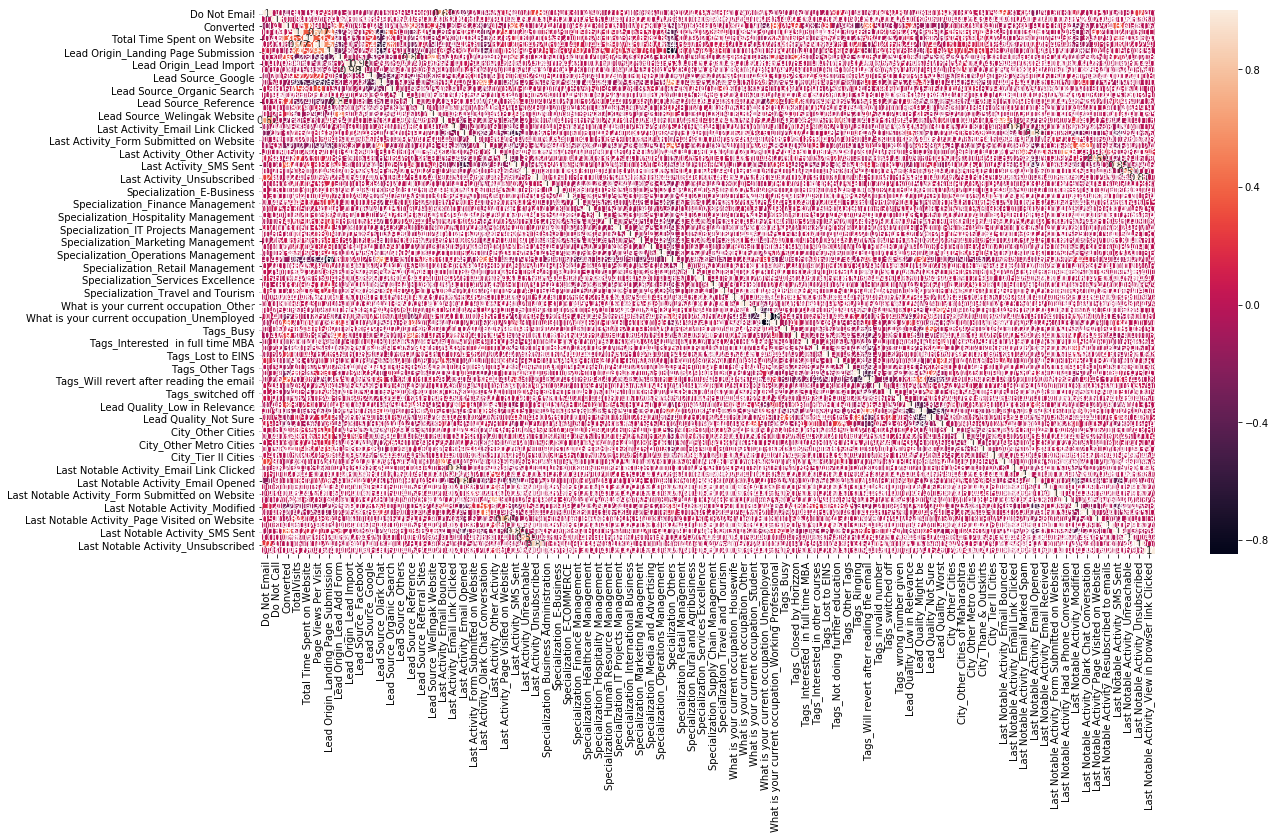

In [66]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(leads_data.corr(),annot = True)
plt.show()

### Feature Selction using RFE

In [67]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 13)             # running RFE with 13 variables as output
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

[False False False False False False  True False False False False False
 False False False  True False False False False False  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True  True  True False False  True False False False  True False False
  True False  True  True  True False False False False False False False
 False False False False False False False False False  True False False
 False]
[ 5 30 54 73 53 12  1 50 35 28 37 27 61 65 58  1 19 32 33 56  4  1 57 13 21
 26 40 39 59 48 31 43 66 63 25 60 41 67 11 29 23 46 69 38 20 42 45 10  1  1
  1 16  8  1  7 49  3  1  6  2  1 72  1  1  1 47 68 55 62 52 18 15 34 64 71
 36 17 14 22 44 70  1 51  9 24]


In [68]:
# Variables selected by RFE 
col = X_train.columns[rfe.support_]
col

Index(['Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Other Activity',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Will revert after reading the email', 'Tags_wrong number given',
       'Lead Quality_Might be', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [69]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_H

In [70]:
#Comparing the model with StatsModels
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -1797.9
Date:                Mon, 10 Jun 2019   Deviance:                       3595.8
Time:                        21:53:49   Pearson chi2:                 2.20e+04
No. Iterations:                    22                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5040      0.248    -10.106      0.000      -2.990      -2.018
Lead Origin_Lead Add Form                                1.7618      0.321      5.486      0.000       1.132       2.391
Lead Source_Welingak Website                             2.3995      0.792      3.029      0.002       0.847       3.952
Last Activity_Other Activity                             2.0565      0.576      3.571      0.000       0.928       3.185
What is your current occupation_Working Professional     2.6885      0.239     11.230      0.000       2.219       3.158
Tags_Busy                                                3.6829      0.287     12.844      0.000       3.121       4.245
Tags_Closed by Horizzon                                  9.0541      0.760     11.908      0.000       7.564      10.544
Tags_Lost to EINS                                        9.9604      0.749     13.305      0.000       8.493      11.428
Tags_Will revert after reading the email                 5.1495      0.219     23.481      0.000       4.720       5.579
Tags_wrong number given                                -20.2679   1.19e+04     -0.002      0.999   -2.34e+04    2.33e+04
Lead Quality_Might be                                   -3.8903      0.210    -18.481      0.000      -4.303      -3.478
Lead Quality_Not Sure                                   -2.0559      0.267     -7.710      0.000      -2.579      -1.533
Lead Quality_Worst                                      -3.6824      0.919     -4.007      0.000      -5.484      -1.881
Last Notable Activity_SMS Sent                           2.9148      0.111     26.301      0.000       2.698       3.132
========================================================================================================================
"""

In [71]:
col1 = col.drop('Tags_wrong number given',1)
col1

Index(['Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Other Activity',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Will revert after reading the email', 'Lead Quality_Might be',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [72]:
X_train_sm = sm.add_constant(X_train[col1])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -1799.4
Date:                Mon, 10 Jun 2019   Deviance:                       3598.8
Time:                        21:53:49   Pearson chi2:                 2.22e+04
No. Iterations:                     8                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5292      0.247    -10.239      0.000      -3.013      -2.045
Lead Origin_Lead Add Form                                1.7683      0.322      5.495      0.000       1.138       2.399
Lead Source_Welingak Website                             2.3929      0.792      3.020      0.003       0.840       3.946
Last Activity_Other Activity                             2.0562      0.576      3.573      0.000       0.928       3.184
What is your current occupation_Working Professional     2.6938      0.240     11.230      0.000       2.224       3.164
Tags_Busy                                                3.7140      0.286     12.964      0.000       3.153       4.276
Tags_Closed by Horizzon                                  9.0776      0.760     11.939      0.000       7.587      10.568
Tags_Lost to EINS                                        9.9870      0.749     13.340      0.000       8.520      11.454
Tags_Will revert after reading the email                 5.1734      0.219     23.591      0.000       4.744       5.603
Lead Quality_Might be                                   -3.8888      0.210    -18.494      0.000      -4.301      -3.477
Lead Quality_Not Sure                                   -2.0635      0.266     -7.758      0.000      -2.585      -1.542
Lead Quality_Worst                                      -3.7192      0.916     -4.061      0.000      -5.514      -1.924
Last Notable Activity_SMS Sent                           2.9134      0.111     26.297      0.000       2.696       3.131
========================================================================================================================
"""

In [73]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.223631
1012    0.809873
9226    0.010024
4750    0.841416
7987    0.995478
1281    0.841416
2880    0.223631
4971    0.884397
7536    0.933652
1248    0.001629
dtype: float64

In [74]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([ 0.22363084,  0.8098726 ,  0.01002392,  0.84141578,  0.99547829,
        0.84141578,  0.22363084,  0.88439668,  0.93365246,  0.00162927])

In [75]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.223631,3009
1,0,0.809873,1012
2,0,0.010024,9226
3,1,0.841416,4750
4,1,0.995478,7987


In [76]:
#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.223631,3009,0
1,0,0.809873,1012,1
2,0,0.010024,9226,0
3,1,0.841416,4750,1
4,1,0.995478,7987,1


In [77]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3753  152]
 [ 496 1950]]


In [78]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.897968823807


In [79]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [80]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Source_Welingak Website,1.34
5,Tags_Closed by Horizzon,1.14
4,Tags_Busy,1.12
6,Tags_Lost to EINS,1.05
2,Last Activity_Other Activity,1.01
8,Lead Quality_Might be,1.01
0,Lead Origin_Lead Add Form,0.66
3,What is your current occupation_Working Profes...,0.56
10,Lead Quality_Worst,0.36
11,Last Notable Activity_SMS Sent,0.36


In [81]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [82]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.79721995094031073

In [83]:
# Let us calculate specificity
TN / float(TN+FP)

0.96107554417413577

In [84]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.0389244558259


In [85]:
# positive predictive value 
print (TP / float(TP+FP))

0.92768791627


In [86]:
# Negative predictive value
print (TN / float(TN+ FN))

0.883266650977


### Plotting the ROC Curve

In [87]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

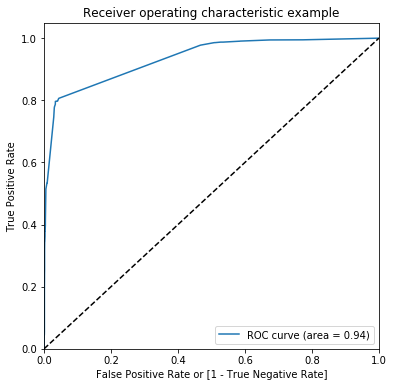

(array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.56081946e-04,   2.56081946e-04,   2.56081946e-04,
          2.56081946e-04,   5.12163892e-04,   7.68245839e-04,
          7.68245839e-04,   1.02432778e-03,   1.02432778e-03,
          1.02432778e-03,   1.02432778e-03,   1.02432778e-03,
          1.02432778e-03,   1.02432778e-03,   1.02432778e-03,
          1.02432778e-03,   1.02432778e-03,   1.02432778e-03,
          1.02432778e-03,   1.02432778e-03,   1.02432778e-03,
          1.28040973e-03,   1.28040973e-03,   1.28040973e-03,
          1.28040973e-03,   1.28040973e-03,   1.28040973e-03,
          1.28040973e-03,   1.53649168e-03,   1.53649168e-03,
          1.53649168e-03,   1.79257362e-03,   2.04865557e-03,
          2.81690141e-03,   2.81690141e-03,   3.07298335e-03,
          3.32906530e-03,   3.84122919e-03,   3.84122919e-03,
        

In [88]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### Finding optimal cutoff

In [89]:
# Different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.223631,3009,0,1,1,1,0,0,0,0,0,0,0
1,0,0.809873,1012,1,1,1,1,1,1,1,1,1,1,0
2,0,0.010024,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.841416,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.995478,7987,1,1,1,1,1,1,1,1,1,1,1


In [90]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.680208  0.985691  0.488860
0.2   0.2  0.704141  0.977514  0.532907
0.3   0.3  0.897182  0.797220  0.959795
0.4   0.4  0.897969  0.797220  0.961076
0.5   0.5  0.897969  0.797220  0.961076
0.6   0.6  0.900173  0.794767  0.966197
0.7   0.7  0.894662  0.775143  0.969526
0.8   0.8  0.894505  0.774734  0.969526
0.9   0.9  0.810109  0.515536  0.994622


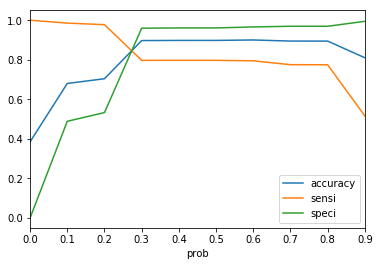

In [91]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [92]:
#### From the curve above, 0.275 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.275 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.223631,3009,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.809873,1012,1,1,1,1,1,1,1,1,1,1,0,1
2,0,0.010024,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.841416,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.995478,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [93]:
#Assign Lead Score
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.223631,3009,0,1,1,1,0,0,0,0,0,0,0,0,22
1,0,0.809873,1012,1,1,1,1,1,1,1,1,1,1,0,1,81
2,0,0.010024,9226,0,1,0,0,0,0,0,0,0,0,0,0,1
3,1,0.841416,4750,1,1,1,1,1,1,1,1,1,1,0,1,84
4,1,0.995478,7987,1,1,1,1,1,1,1,1,1,1,1,1,100


In [94]:
#Overall Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [95]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.80621422730989367

In [96]:
# Let us calculate specificity
TN / float(TN+FP)

0.95620998719590267

In [97]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.0437900128041


In [98]:
# Positive predictive value 
print (TP / float(TP+FP))

0.920205319645


In [99]:
# Negative predictive value
print (TN / float(TN+ FN))

0.887357414449


In [100]:
#Let's look at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3753,  152],
       [ 496, 1950]], dtype=int64)

In [101]:
from sklearn.metrics import precision_score, recall_score

In [102]:
#Precision
precision_score(y_train_pred_final.Converted , y_train_pred_final.Predicted)

0.92768791627021885

In [103]:
# Recall
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.79721995094031073

In [104]:
#Making predictions on the test set
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [105]:
X_test = X_test[col1]
X_test.head()

,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_Other Activity,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Will revert after reading the email,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_SMS Sent
3271,0,0,0,0,0,0,0,1,1,0,0,0
1490,0,0,0,1,0,0,0,1,0,0,0,0
7936,0,0,0,0,0,0,0,1,1,0,0,0
4216,1,0,0,0,0,1,0,0,0,0,0,0
3830,0,0,0,0,0,0,0,1,1,0,0,0


In [106]:
X_test_sm = sm.add_constant(X_test)

In [107]:
y_test_pred = res.predict(X_test_sm)

In [108]:
y_test_pred[:10]

3271    0.223631
1490    0.995218
7936    0.223631
4216    0.999756
3830    0.223631
1800    0.995218
6507    0.157192
4821    0.001629
4223    0.999342
4714    0.223631
dtype: float64

In [109]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [110]:
y_pred_1.head()

,0
3271,0.223631
1490,0.995218
7936,0.223631
4216,0.999756
3830,0.223631


In [111]:
y_test_df = pd.DataFrame(y_test)

In [112]:
y_test_df['Prospect ID'] = y_test_df.index

In [113]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [114]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [115]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.223631
1,1,1490,0.995218
2,0,7936,0.223631
3,1,4216,0.999756
4,0,3830,0.223631


In [116]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted probability'})

In [117]:
y_pred_final.head()

,Converted,Prospect ID,Converted probability
0,0,3271,0.223631
1,1,1490,0.995218
2,0,7936,0.223631
3,1,4216,0.999756
4,0,3830,0.223631


In [118]:
y_pred_final['final_predicted'] = y_pred_final['Converted probability'].map(lambda x: 1 if x > 0.275 else 0)
y_pred_final.head()

,Converted,Prospect ID,Converted probability,final_predicted
0,0,3271,0.223631,0
1,1,1490,0.995218,1
2,0,7936,0.223631,0
3,1,4216,0.999756,1
4,0,3830,0.223631,0


In [119]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.89717223650385602